In [5]:
import torch
import numpy as np
import torchvision.transforms as T
from datasets import MP3dPSP
from datasets.eqr2psp import e2p

In [6]:
tensor2pil = T.ToPILImage()

In [22]:
ds = MP3dPSP('val')

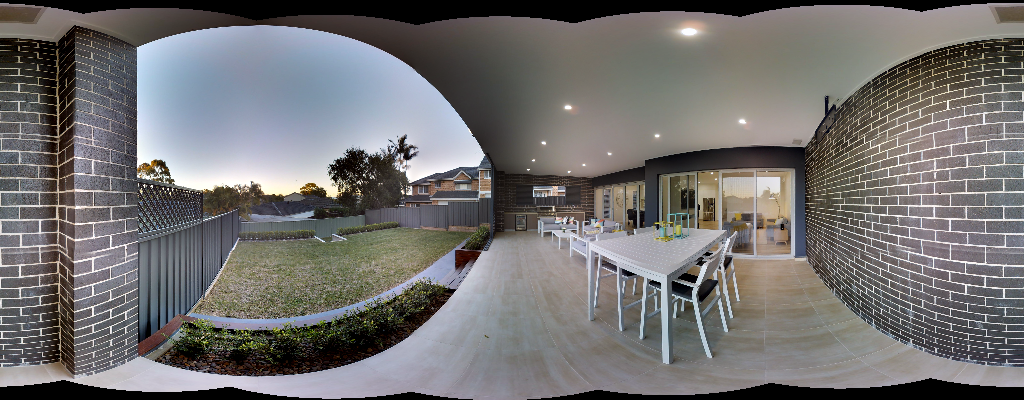

In [23]:
x, _ = ds[0]
tensor2pil(x)

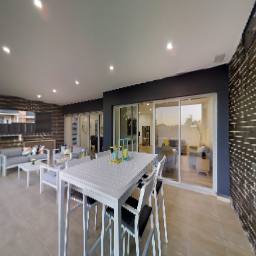

In [29]:
fov_deg = (100, 100)
u_deg, v_deg = 60, 0
out_hw = (256, 256)
in_rot_deg = 0
psp_img = e2p(x, fov_deg, u_deg, v_deg, out_hw, in_rot_deg)
tensor2pil(psp_img)

In [1]:
import torch
torch.nn.Upsample

torch.nn.modules.upsampling.Upsample

In [1]:
import torch
from torchinfo import summary
from model.backbone import ViTBackbone

In [2]:
model = ViTBackbone([18, 48], dropout=False).to('cuda:0')

In [3]:
summary(model, (1, 3, 288, 768))

Layer (type:depth-idx)                   Output Shape              Param #
ViTBackbone                              --                        --
├─Normalize: 1-1                         [1, 3, 288, 768]          --
├─VisionTransformer: 1                   --                        --
│    └─PatchEmbed: 2                     --                        --
│    │    └─Conv2d: 3-1                  [1, 768, 18, 48]          590,592
├─Upsample: 1-2                          [1, 768, 18, 48]          --
├─VisionTransformer: 1                   --                        --
│    └─Sequential: 2                     --                        --
│    │    └─Block: 3-2                   [1, 865, 768]             7,087,872
│    │    └─Block: 3-3                   [1, 865, 768]             7,087,872
│    │    └─Block: 3-4                   [1, 865, 768]             7,087,872
│    │    └─Block: 3-5                   [1, 865, 768]             7,087,872
│    │    └─Block: 3-6                   [1, 865, 76